In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


### Часть I

[Titanic dataset](https://www.kaggle.com/competitions/titanic/overview) — данные о пассажирах титаника

Загрузим данные

In [2]:
titanic = pd.read_csv('../data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Задание 1
Постройте графики распределения возвраста в зависмости от совокупности факторов:
- пол
- выжил или нет

[En]
Exercise 1 <br>
Construct age distribution graphs depending on a combination of factors:

- gender
- survived or not

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


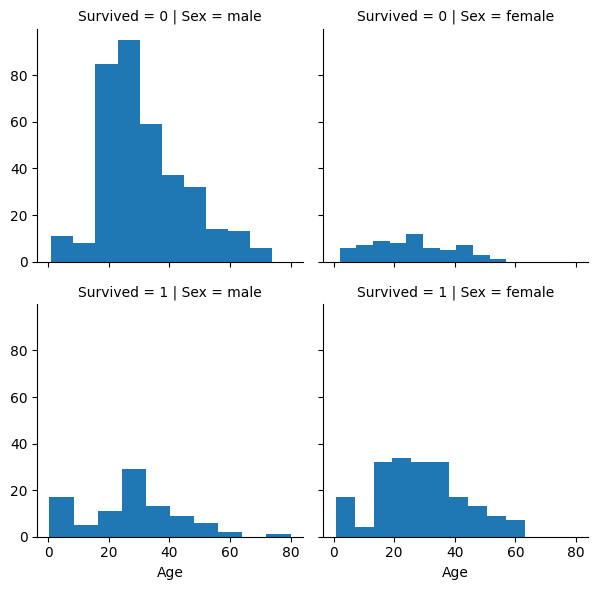

In [4]:
grouped_data = titanic.groupby(['Sex', 'Survived'])['Age']
print(grouped_data)

g= sns.FacetGrid(titanic, col='Sex', row='Survived')
g.map(plt.hist, 'Age')
g.add_legend()
plt.show()


#### Задание 2
Найдидте самое популярное женское имя

[En] Task 02 <br>
Find the most popular female name

In [5]:
female_passengers = titanic[titanic['Sex'] == 'female']

# Function to extract the name correctly
# Here's what I did , "I only took the calling name
'''
for example, 
Graham, Miss. Margaret Edith  Margaret is her name 
Najib, Miss. Adele Kiamie "Jane" Jane is her name 
Abelson, Mrs. Samuel (Hannah Wizosky) Hannah is her name 
Bystrom, Mrs. (Karolina) Karolina is her name 
Baclini, Mrs. Solomon (Latifa Qurban) Latifa is her name 
Lines, Miss. Mary Conover Mary is her name

'''
def extract_name(name):
    parts = name.split('(')
    if len(parts) > 1:
        return parts[1].replace(')', '').strip()
    else:
        return name.split(' ')[-1]

female_passengers_name = female_passengers['Name'].apply(extract_name)
name_count = female_passengers_name.value_counts()

most_popular_female_name = name_count.idxmax()
count_of_most_popular_female_name = name_count.max()

print(name_count,)
print(f"The most popular female name is '{most_popular_female_name}' with {count_of_most_popular_female_name} occurrences.")

Name
Mary              9
Sofia             6
Elizabeth         5
Anna              5
Bertha            4
                 ..
Borie             1
Anna Sylfven      1
Josefina          1
Miriam Sternin    1
"Carrie"          1
Name: count, Length: 266, dtype: int64
The most popular female name is 'Mary' with 9 occurrences.


#### Задание 3
Сколько на Титанике было детей?

Task 3
How many children were there on the Titanic?

In [6]:
# under 18yr all are considerd as children

children = (titanic['Age'] <= 18) & (~titanic['Age'].isna())
children_count = titanic[children]
number_of_children = len(children_count)

# passengers who don't have any Age data 
passanger_with_no_age_data = titanic['Age'].isna()
count_of_them = len(passanger_with_no_age_data)

print(f"Number of children (18 years old or younger): {number_of_children}")
print('\n')
print(f"Number of passengers without age data on the Titanic: {count_of_them}")


Number of children (18 years old or younger): 139


Number of passengers without age data on the Titanic: 891


#### Задание 4
Найдите и подкрепите агрументами такое правило, что
1) все удовлетворяющие ему пассаижры выжили;
2) все уодвлетворяющие ему пассажиры погибли.

Постарайтесь найти такие правила, чтобы под них попало как можно большее число пассажиров

Task 4 <br>
Find and support with arguments such a rule that <br>

- all the passengers who satisfied him survived;
- all the passengers who met him died.
  Try to find rules so that as many passengers as possible fall under them

#### Well here is the thing, After boarding all the women, will there be any boat left for men?!  :D 

<a href="https://medium.com/silk-stories/women-and-children-first-9273e97289b0"> Women and Children First </a>



Rules for Surviving Male Passengers: 

- Rule 01 : If a male passenger is in 1st or 2nd class, 
he is more likely to survive.

- Rule 02 : If a male passenger is under the age of 18, 
he is more likely to survive.

Rules for Male Passengers Who Did Not Survive:

- Rule 3: If a male passenger is in 3rd class and over the age of 60, 
he is less likely to survive.
- Rule 4: If a male passenger is between the ages of 18 and 40 and 
has no family members onboard, he is less likely to survive.

In [7]:
# Rules for surviving male passengers
surviving_male_rule_1 = (titanic['Sex'] == 'male') & (titanic['Pclass'].isin([1, 2]))
surviving_male_rule_2 = (titanic['Sex'] == 'male') & (titanic['Age'] < 18)

# Rules for male passengers who did not survive
not_surviving_male_rule_3 = (titanic['Sex'] == 'male') & (titanic['Pclass'] == 3) & (titanic['Age'] > 60)
not_surviving_male_rule_4 = (titanic['Sex'] == 'male') & (titanic['Age'].between(18, 40))


titanic['Survival_Prediction'] = 0 # long dead
titanic.loc[surviving_male_rule_1 | surviving_male_rule_2, 'Survival_Prediction'] = 1
titanic.loc[not_surviving_male_rule_3 | not_surviving_male_rule_4, 'Survival_Prediction'] = 0
print(titanic)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

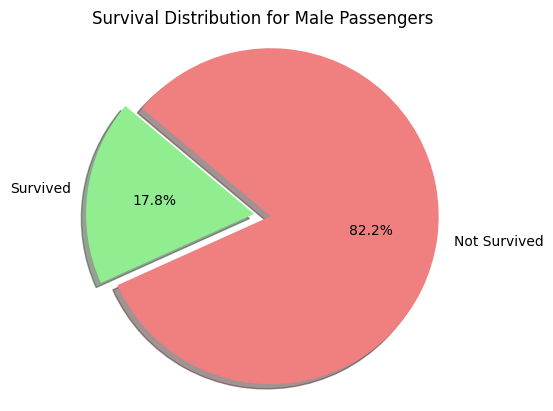

In [8]:
survived = titanic[titanic['Survival_Prediction'] == 1]['Survival_Prediction'].count()
not_survived = titanic[titanic['Survival_Prediction'] == 0]['Survival_Prediction'].count()

labels = ['Survived', 'Not Survived']
sizes = [survived, not_survived]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 

plt.title('Survival Distribution for Male Passengers')
plt.show()

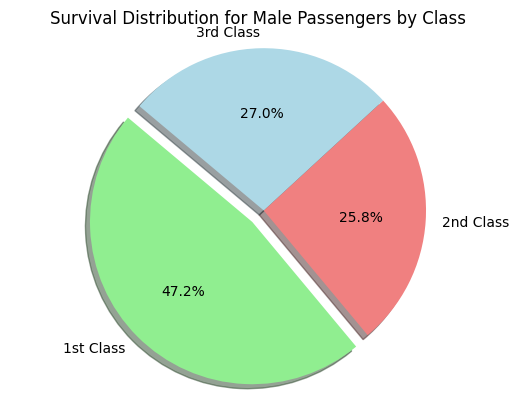

In [9]:
survived_by_class = titanic[(titanic['Sex'] == 'male') & (titanic['Survival_Prediction'] == 1)].groupby('Pclass').size()
labels = ['1st Class', '2nd Class', '3rd Class']
sizes = survived_by_class.values
colors = ['lightgreen', 'lightcoral', 'lightblue']
explode = (0.1, 0, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Survival Distribution for Male Passengers by Class')
plt.show()

### Часть II

#### Задание 5
Вам необхоидмо составить и обосновать правило, которое идеально классифицирует объекты из таблицы `data`.
Класс примера находится в колонке `label`, а признаки — в колонках `x` и `y`

Task 5 <br>
You need to create and justify a rule that ideally classifies objects from the data table. The example class is in the label column, and the attributes are in the x and y columns

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival_Prediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### To classify passengers as either "Survived" or "Not Survived" </<br>

- Classification Rule: <br>
if the "Sex" is female and "Pclass" is = 1 or 2 , then "Survived" = "1" else "Survived" = 0

- Justification: <br>

- Sex = Why Sex or gender is first thing to consider is that historically, during the Titanic disaster, there was a well-documented "women and children first" policy ( which I already mentioned above) , where priority was given to women and children when evacuating the ship. Therefore, it is reasonable to assume that female passengers had a higher chance of survival compared to male passengers. This is supported by the survival statistics of the Titanic.  ( down below)





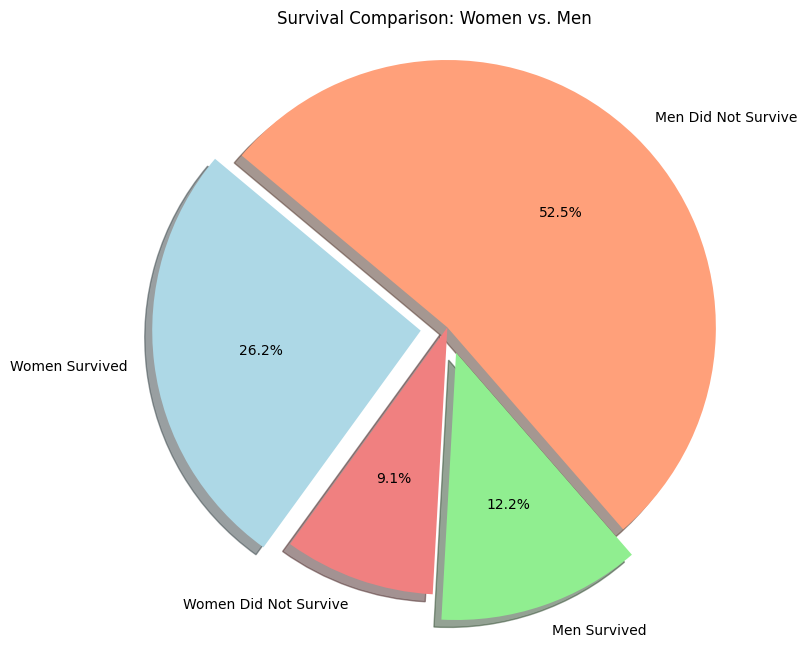

In [11]:
survived_women = ((titanic['Sex'] == 'female') & (titanic["Survived"]==1)).sum()
survived_men = ((titanic['Sex'] == 'male') & (titanic["Survived"] == 1)).sum()

not_survived_women = ((titanic['Sex'] == 'female') & (titanic["Survived"]==0)).sum()
not_survived_men = ((titanic['Sex'] == 'male') & (titanic["Survived"] == 0)).sum()

labels = ['Women Survived', 'Women Did Not Survive', 'Men Survived', 'Men Did Not Survive']
sizes = [survived_women, not_survived_women, survived_men, not_survived_men]
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']
explode = (0.1, 0, 0.1, 0) 

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Survival Comparison: Women vs. Men')
plt.axis('equal')  

plt.show()

- Pclass (Passenger Class): <br> The second attribute we consider is "Pclass." Passengers were divided into different classes (1st, 2nd, and 3rd), with 1st-class passengers having better access to lifeboats and evacuation resources. Therefore, it is likely that passengers in 1st and 2nd class had a higher chance of survival compared to those in 3rd class. (down below)

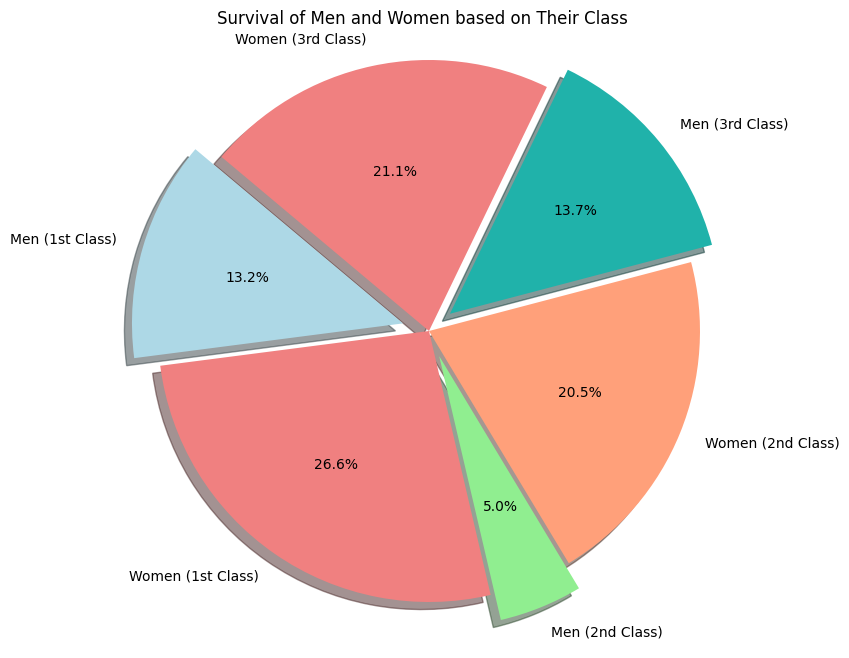

In [12]:
men_from_first_class = ((titanic["Sex"] == 'male') & (titanic["Survived"] == 1) & (titanic["Pclass"] == 1)).sum()
men_from_second_class = ((titanic["Sex"] == 'male') & (titanic["Survived"] == 1) & (titanic["Pclass"] == 2)).sum()
men_from_third_class = ((titanic["Sex"] == 'male') & (titanic["Survived"] == 1) & (titanic["Pclass"] == 3)).sum()

women_from_first_class = ((titanic["Sex"] == 'female') & (titanic["Survived"] == 1) & (titanic["Pclass"] == 1)).sum()
women_from_second_class = ((titanic["Sex"] == 'female') & (titanic["Survived"] == 1) & (titanic["Pclass"] == 2)).sum()
women_from_third_class = ((titanic["Sex"] == 'female') & (titanic["Survived"] == 1) & (titanic["Pclass"] == 3)).sum()

labels = [
    'Men (1st Class)', 'Women (1st Class)',
    'Men (2nd Class)', 'Women (2nd Class)',
    'Men (3rd Class)', 'Women (3rd Class)'
]
sizes = [
    men_from_first_class, women_from_first_class,
    men_from_second_class, women_from_second_class,
    men_from_third_class, women_from_third_class
]
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightcoral']
explode = (0.1, 0, 0.1, 0, 0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Survival of Men and Women based on Their Class')
plt.axis('equal')

plt.show()

By combining these two attributes, as we can see the graph above. Rule takes into account both gender and passenger class, which were key factors in determining survival rates during the Titanic disaster. This rule aligns with the historical context and is a simplification of the given dataset .
